On va étudier un pool de cotes de bookmakers anglais lors de l'année 2016 afin d'avoir une idée des performances des professionnels dans le secteur de la prédiction de match de football. On étudiera également si de simples stratégies de paris sportifs sont rentables.

In [22]:
import pandas as pd 
import numpy as np 


In [23]:
odds_2016_2017 = pd.read_csv('2016.csv')


In [24]:
odds_2016_2017.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [25]:
odds_2016_short = odds_2016_2017[['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']]

On garde seulement 7 bookmakers c'est amplement suffisant 

In [26]:
len(odds_2016_short)

380

In [27]:
odds_2016_short.drop(['HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'], axis =1)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,1.53,4.50,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.20,6.00,1.53,4.50,6.50
1,E0,12/08/2017,Brighton,Man City,0,2,A,11.00,5.50,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.80,1.33,10.00,5.50,1.33
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,1.25,6.50,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.50,13.00,1.25,6.25,15.00
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,1.83,3.60,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.30,5.00,1.83,3.60,5.00
4,E0,12/08/2017,Everton,Stoke,1,0,H,1.70,3.80,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.50,5.50,1.70,3.80,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,13/05/2018,Newcastle,Chelsea,3,0,H,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.0,1.70,5.50,3.90,1.60,5.96,4.22,1.61,6.50,4.00,1.57,6.00,4.20,1.60
376,E0,13/05/2018,Southampton,Man City,0,1,A,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.4,1.45,7.00,4.60,1.40,8.06,5.11,1.42,8.50,4.50,1.40,7.50,5.00,1.44
377,E0,13/05/2018,Swansea,Stoke,1,2,A,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.5,4.10,1.87,3.60,4.00,1.91,3.72,4.29,1.91,3.75,4.00,1.90,3.75,4.20
378,E0,13/05/2018,Tottenham,Leicester,5,4,H,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.5,9.50,1.30,5.50,9.50,1.33,5.95,9.56,1.30,6.00,9.00,1.33,5.75,9.50


In [28]:
lt_odds_home, lt_odds_away,lt_odds_draw = [],[],[]
for i in odds_2016_short.columns:
  if i.endswith('H'):
    lt_odds_home.append(i)
  elif i.endswith('D'):
    lt_odds_draw.append(i)
  elif i.endswith('A'):
    lt_odds_away.append(i)

On récupère toutes les cotes d'un même type (extérieur, à domicile, et match nul) afin de trouver une cote moyenne dans chaque catégorie pour tous les matchs. Ainsi nous nous appuyons sur l'intelligence collective des bookmakers plutôt que sur des performances individuelles, comme dans l'article de Lisandro Kaunitz, Shenjun Zhong and Javier Kreiner: Beating the bookies with their own numbers - and how the online sports betting market is rigged. 

In [29]:
odds_2016_short['odds_home_mean']= odds_2016_short[lt_odds_home].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
odds_2016_short['odds_away_mean']= odds_2016_short[lt_odds_away].mean(axis=1)
odds_2016_short['odds_draw_mean']= odds_2016_short[lt_odds_draw].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
(1/odds_2016_short[['odds_home_mean','odds_away_mean', 'odds_draw_mean']]).sum(axis=1)

0      1.042276
1      1.042673
2      1.037917
3      1.042744
4      1.042260
         ...   
375    1.037864
376    1.043894
377    1.041236
378    1.041932
379    1.040777
Length: 380, dtype: float64

La somme de l'inverse des cotes pour un même match devrait normalement,si le jeu n'était pas truqué en faveur des bookmakers, être égal à 1. Nous retrouvons ici facilement une des preuves avancées dans l'article de recherche cité plus haut.  

In [32]:
odds_2016_short['Bookie_pred'] = odds_2016_short[['odds_home_mean','odds_away_mean', 'odds_draw_mean']].min(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


On identifie ici le favori des bookmakers afin de vérifier l'accuracy des bookmakers. 

In [33]:
odds_2016_short['Bookie_pred_def'] = odds_2016_short['Bookie_pred']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
odds_2016_short[['Bookie_pred','odds_home_mean','odds_away_mean', 'odds_draw_mean']]

,Bookie_pred,odds_home_mean,odds_away_mean,odds_draw_mean
0,1.504286,1.504286,6.514286,4.464286
1,1.325714,10.135714,1.325714,5.271429
2,1.242857,1.242857,14.178571,6.142857
3,1.820000,1.820000,4.822857,3.497143
4,1.695714,1.695714,5.508571,3.690000
...,...,...,...,...
375,1.601429,5.922857,1.601429,4.088571
376,1.417143,7.787143,1.417143,4.765714
377,1.888571,1.888571,4.148571,3.694286
378,1.312857,1.312857,9.330000,5.778571


In [35]:
odds_2016_short['Bookie_pred']

0      1.504286
1      1.325714
2      1.242857
3      1.820000
4      1.695714
         ...   
375    1.601429
376    1.417143
377    1.888571
378    1.312857
379    2.387143
Name: Bookie_pred, Length: 380, dtype: float64

In [36]:
for i in range(len(odds_2016_short)):
  if odds_2016_short['Bookie_pred'][i] == odds_2016_short['odds_home_mean'][i]:
    odds_2016_short['Bookie_pred_def'][i] = 'H'
  elif odds_2016_short['Bookie_pred'][i] == odds_2016_short['odds_away_mean'][i]:
    odds_2016_short['Bookie_pred_def'][i] = 'A'
  elif odds_2016_short['Bookie_pred'][i] == odds_2016_short['odds_draw_mean'][i]:
    odds_2016_short['Bookie_pred_def'][i] = 'D'
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [37]:
odds_2016_short[['Bookie_pred','odds_home_mean','odds_away_mean', 'odds_draw_mean','Bookie_pred_def','FTR']]


,Bookie_pred,odds_home_mean,odds_away_mean,odds_draw_mean,Bookie_pred_def,FTR
0,1.504286,1.504286,6.514286,4.464286,H,H
1,1.325714,10.135714,1.325714,5.271429,A,A
2,1.242857,1.242857,14.178571,6.142857,H,A
3,1.820000,1.820000,4.822857,3.497143,H,A
4,1.695714,1.695714,5.508571,3.690000,H,H
...,...,...,...,...,...,...
375,1.601429,5.922857,1.601429,4.088571,A,H
376,1.417143,7.787143,1.417143,4.765714,A,A
377,1.888571,1.888571,4.148571,3.694286,H,A
378,1.312857,1.312857,9.330000,5.778571,H,H


On fait exactement la même chose pour l'underdog.

In [38]:
odds_2016_short['Bookie_underdog'] = (odds_2016_short[['odds_home_mean','odds_away_mean','odds_draw_mean']]).max(axis =1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
odds_2016_short['Bookie_underdog']

0       6.514286
1      10.135714
2      14.178571
3       4.822857
4       5.508571
         ...    
375     5.922857
376     7.787143
377     4.148571
378     9.330000
379     3.415714
Name: Bookie_underdog, Length: 380, dtype: float64

In [40]:
odds_2016_short['Bookie_fav'] = (odds_2016_short[['odds_home_mean','odds_away_mean','odds_draw_mean']]).min(axis =1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
odds_2016_short['Bookie_pred_underdog'] = odds_2016_short['Bookie_pred']
for i in range(len(odds_2016_short)):
  if odds_2016_short['Bookie_underdog'][i] == odds_2016_short['odds_home_mean'][i]:
    odds_2016_short['Bookie_pred_underdog'][i] = 'H'
  elif odds_2016_short['Bookie_underdog'][i] == odds_2016_short['odds_away_mean'][i]:
    odds_2016_short['Bookie_pred_underdog'][i] = 'A'
  elif odds_2016_short['Bookie_underdog'][i] == odds_2016_short['odds_draw_mean'][i]:
    odds_2016_short['Bookie_pred_underdog'][i] = 'D'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [42]:
odds_2016_short['Bookie_pred_fav'] = odds_2016_short['Bookie_pred']
for i in range(len(odds_2016_short)):
  if odds_2016_short['Bookie_fav'][i] == odds_2016_short['odds_home_mean'][i]:
    odds_2016_short['Bookie_pred_fav'][i] = 'H'
  elif odds_2016_short['Bookie_fav'][i] == odds_2016_short['odds_away_mean'][i]:
    odds_2016_short['Bookie_pred_fav'][i] = 'A'
  elif odds_2016_short['Bookie_fav'][i] == odds_2016_short['odds_draw_mean'][i]:
    odds_2016_short['Bookie_pred_fav'][i] = 'D'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [43]:
(odds_2016_short['FTR'] == odds_2016_short['Bookie_pred_def']).sum()/380
#55% accuracy moyenne des bookmakers !!!

0.5526315789473685

In [44]:
len(pd.merge(odds_2016_short['FTR'][odds_2016_short.FTR =='H'],odds_2016_short['Bookie_pred_def'][odds_2016_short.Bookie_pred_def == 'H'] ,
             how='inner', left_index= True, right_index = True))/ len(odds_2016_short['FTR'][odds_2016_short.FTR =='H'])
#Accuracy de la moyenne des bookmakers pour les matchs à domicile 

0.8670520231213873

In [45]:
len(pd.merge(odds_2016_short['FTR'][odds_2016_short.FTR =='A'],odds_2016_short['Bookie_pred_def'][odds_2016_short.Bookie_pred_def == 'A'] ,
             how='inner', left_index= True, right_index = True))/ len(odds_2016_short['FTR'][odds_2016_short.FTR =='A'])
#Accuracy de la moyenne des bookmakers pour les matchs à l'extérieur             

0.5555555555555556

In [46]:
len(pd.merge(odds_2016_short['FTR'][odds_2016_short.FTR =='D'],odds_2016_short['Bookie_pred_def'][odds_2016_short.Bookie_pred_def == 'D'] ,
             how='inner', left_index= True, right_index = True))/ len(odds_2016_short['FTR'][odds_2016_short.FTR =='D'])
#Accuracy de la moyenne des bookmakers pour les matchs nuls

0.0

On trace la matrice de confusion des bookmakers: on voit que les bookmakers sont particulièrement performants sur les matc hs à l'extérieur, et plutot bon à domicile. En revanche, ils ne parviennent jamais à prédire correctement un match nul, ce qui pôurrait s'expliquer par des considérations économiques en plus de sportives, personne n'a envie de parier sur le match nul (ce n'est pas assez 'fun'). 


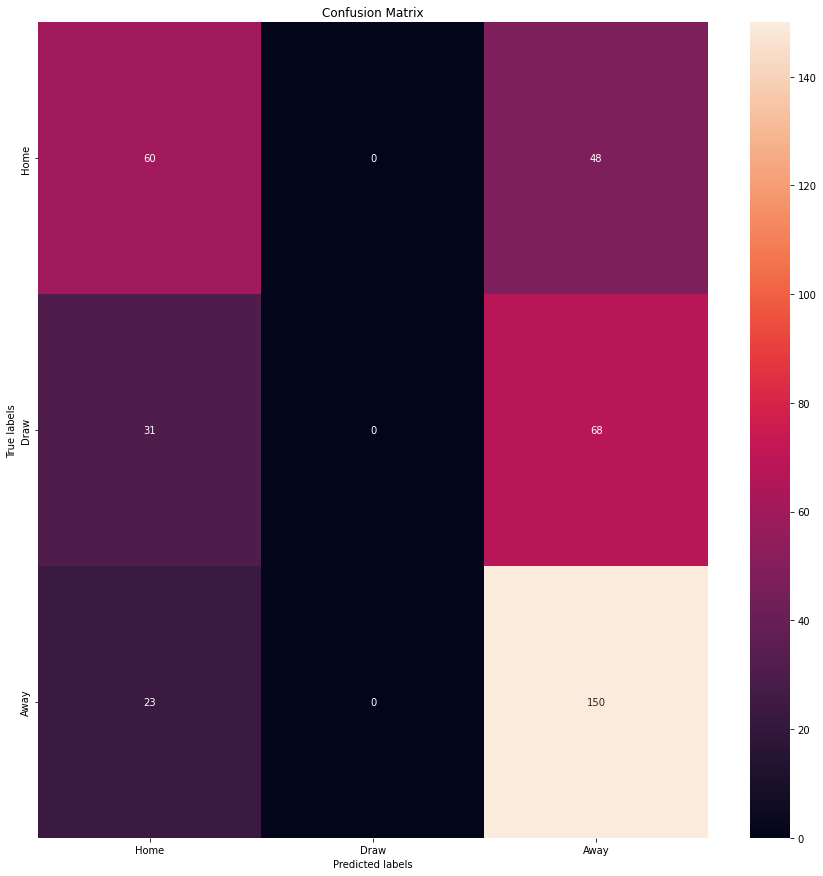

In [47]:
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt     

y_true = odds_2016_short['FTR']
y_pred = odds_2016_short['Bookie_pred_def']

cm = confusion_matrix(y_true, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (15,15))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Home','Draw', 'Away']); ax.yaxis.set_ticklabels(['Home','Draw', 'Away']);

On introduit une stratégie de paris tq on parie toujours un pourcentage de ce qu'il nous reste. Ainsi il est impossible de perdre plus que sa mise de départ. Ici on part de 100 et on mise 5% à chaque fois. 

Quel est votre bankroll? 100
Quel est le pourcentage maximum que vous êtes pret à perdre? 0.05


Text(0, 0.5, 'Euros')

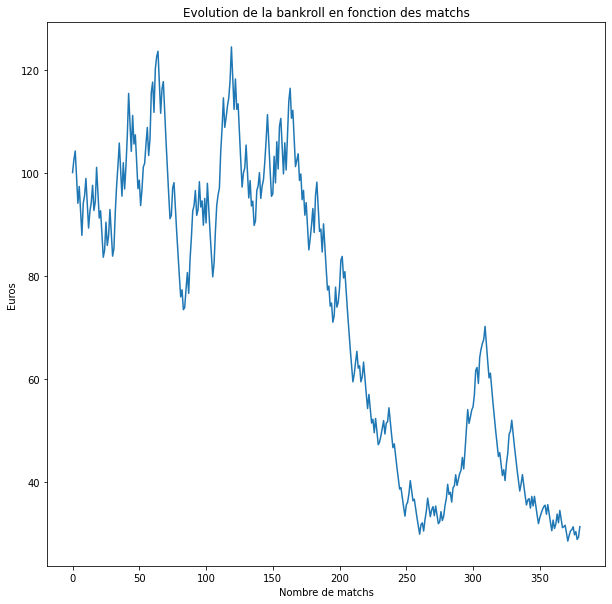

In [51]:
#Strategy betting on the mean
x = input('Quel est votre bankroll? ')
y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
x,y = int(x),float(y)
lt_bet = [x]
z = x
for i in range(len(odds_2016_short)):
    
        
            if odds_2016_short['Bookie_pred_def'].iloc[i] == odds_2016_short['FTR'].iloc[i]:
                
                    x = x + ((x*y)*odds_2016_short['Bookie_pred'].iloc[i]-x*y)
                    lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_def'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x >=0 :
              x = x - (x*y)
              lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_def'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x<0 :
                    z = input('Vous avez tout perdu, combien remettez vous?:')
                    y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                    z = int(z)
                    y = float(y)
                    x = z
                    while z<0:
                        z = input('Vous avez tout perdu, combien remettez vous?:')
                        z = int(z)
                        y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                        y = float(y)
                    x= x - (x*y)
                    
         
plt.figure(figsize=(10,10))                  
plt.plot(lt_bet)
plt.title('Evolution de la bankroll en fonction des matchs')
plt.xlabel('Nombre de matchs')
plt.ylabel('Euros')


Quel est votre bankroll? 100
Quel est le pourcentage maximum que vous êtes pret à perdre? 0.05


Text(0, 0.5, 'Euros')

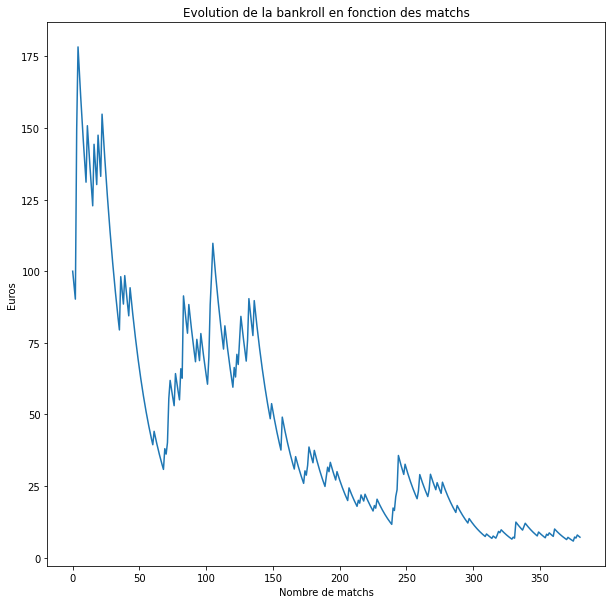

In [52]:
#Strategy betting on the underdog
x = input('Quel est votre bankroll? ')
y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
x,y = int(x),float(y)
lt_bet = [x]
z = x
for i in range(len(odds_2016_short)):
    
        
            if odds_2016_short['Bookie_pred_underdog'].iloc[i] == odds_2016_short['FTR'].iloc[i]:
                
                    x = x + ((x*y)*odds_2016_short['Bookie_underdog'].iloc[i]-x*y)
                    lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_underdog'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x >=0 :
              x = x - (x*y)
              lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_underdog'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x<0 :
                    z = input('Vous avez tout perdu, combien remettez v0ous?:')
                    y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                    z = int(z)
                    y = float(y)
                    x = z
                    while z<0:
                        z = input('Vous avez tout perdu, combien remettez vous?:')
                        z = int(z)
                        y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                        y = float(y)
                    x= x - (x*y)
                    
         
plt.figure(figsize=(10,10))                       
plt.plot(lt_bet)
plt.title('Evolution de la bankroll en fonction des matchs')
plt.xlabel('Nombre de matchs')
plt.ylabel('Euros')


Quel est votre bankroll? 100
Quel est le pourcentage maximum que vous êtes pret à perdre? 0.05


Text(0, 0.5, 'Euros')

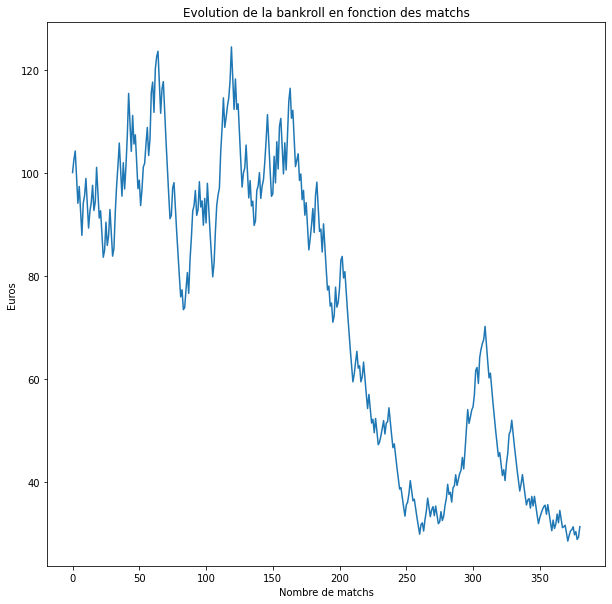

In [53]:
#Strategy betting on the fav
x = input('Quel est votre bankroll? ')
y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
x,y = int(x),float(y)
lt_bet = [x]
z = x
for i in range(len(odds_2016_short)):
    
        
            if odds_2016_short['Bookie_pred_fav'].iloc[i] == odds_2016_short['FTR'].iloc[i]:
                
                    x = x + ((x*y)*odds_2016_short['Bookie_fav'].iloc[i]-x*y)
                    lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_fav'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x >=0 :
              x = x - (x*y)
              lt_bet.append(x)
            elif odds_2016_short['Bookie_pred_fav'].iloc[i] != odds_2016_short['FTR'].iloc[i] and x<0 :
                    z = input('Vous avez tout perdu, combien remettez v0ous?:')
                    y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                    z = int(z)
                    y = float(y)
                    x = z
                    while z<0:
                        z = input('Vous avez tout perdu, combien remettez vous?:')
                        z = int(z)
                        y = input('Quel est le pourcentage maximum que vous êtes pret à perdre? ')
                        y = float(y)
                    x= x - (x*y)
                    
         
plt.figure(figsize=(10,10))    
plt.plot(lt_bet)
plt.title('Evolution de la bankroll en fonction des matchs')
plt.xlabel('Nombre de matchs')
plt.ylabel('Euros')


Aucune des stratégies ci dessous ne semble être rentable. 
